In [1]:
import pathlib
import Utils
import TempoRandomizer
import DynamicsRandomizer
import ArticulationsRandomizer
import pretty_midi
import numpy as np
from main import processMIDI
from copy import deepcopy

Midi duration: 168.0


/Users/jaimegarcia/Desktop/BBCSO/HQ-SOD-generator/Utils.py:38: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  im = ax[n].pcolormesh(X,Y,velocity_matrix,cmap='magma',vmin=0,vmax=127)


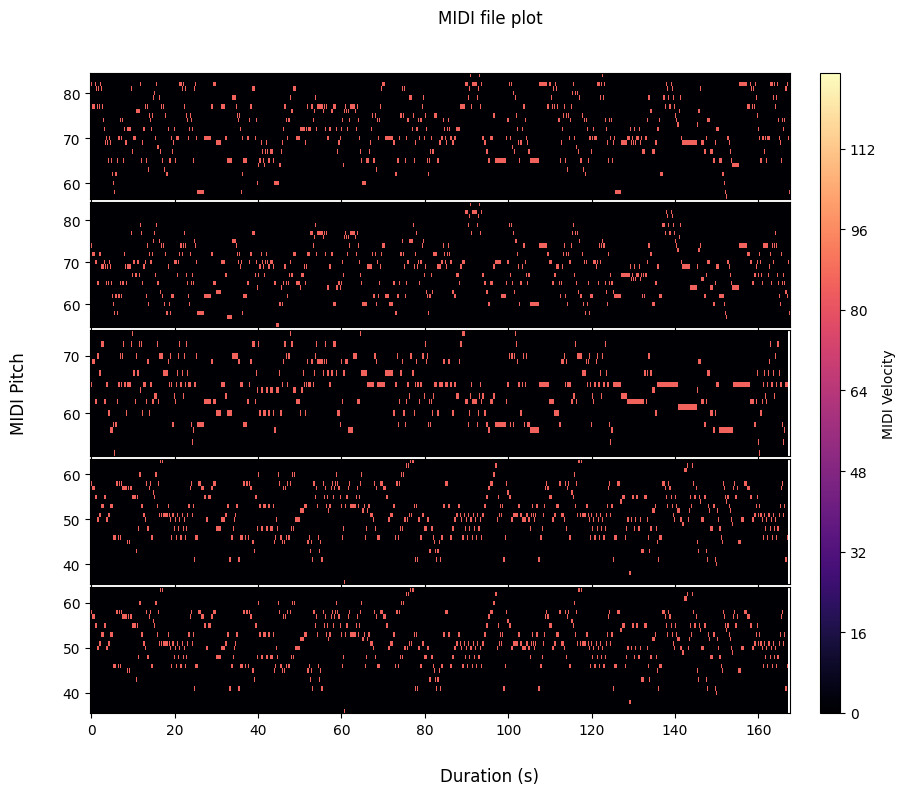

In [2]:
parent_dir = pathlib.Path('/Users/jaimegarcia/Desktop/BBCSO/targetMIDI')
midi_dir = parent_dir / 'labeled'
# import midi file
midi_filepath = midi_dir / 'AgitatoDaFiereTempeste.mid' 
midi_data = pretty_midi.PrettyMIDI(str(midi_filepath))
processed_midi_data = deepcopy(midi_data)
new_midi = pretty_midi.PrettyMIDI()
new_midi.instruments = midi_data.instruments
midi_data = new_midi
print(f'Midi duration: {midi_data.get_end_time()}')
Utils.plotMIDI(midi_data)

Seed: 106382505050098804204208793054081777825048189533684671967754255008060785640427
Tempo changes start at (seconds): 
[[  0.        ]
 [  8.48459323]
 [ 27.1515254 ]
 [ 50.90922602]
 [ 71.27302542]
 [ 74.66688876]
 [ 79.7580938 ]
 [ 81.45508612]
 [110.30248114]
 [115.39314269]
 [162.90909091]]
New tempos (BPM):
 [[119.99289554]
 [103.68846024]
 [ 93.92552678]
 [ 82.86094373]
 [144.64609843]
 [128.56395488]
 [137.56959459]
 [104.72349401]
 [114.32698774]
 [117.51461122]
 [103.54743083]]
New midi duration: 189.19480519480518


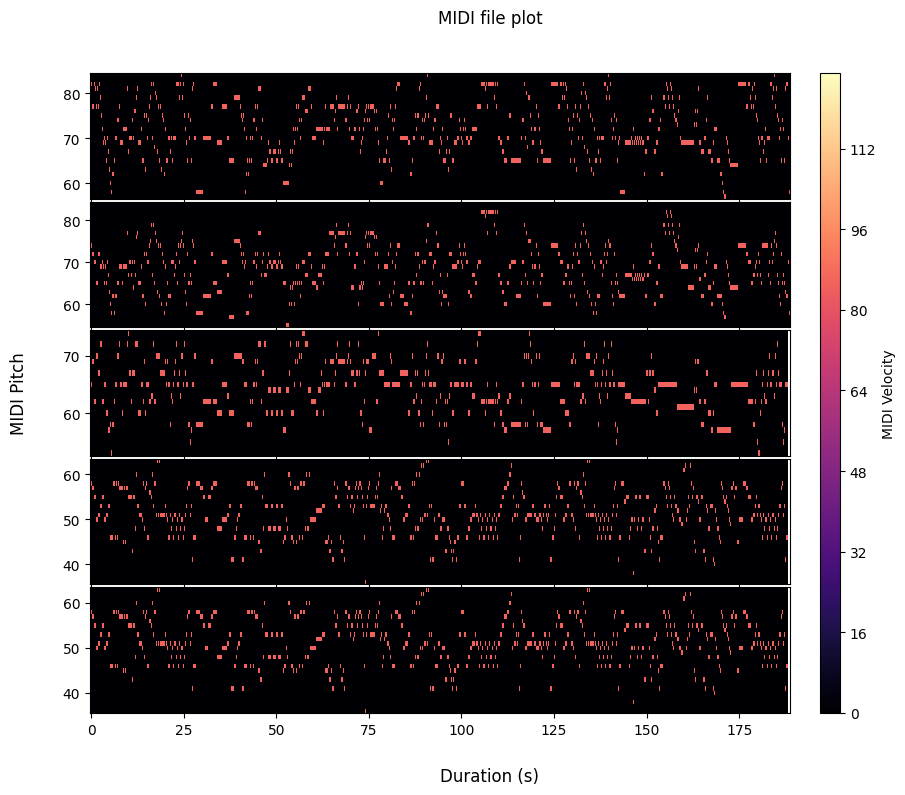

In [3]:
# compute seed
seed = Utils.computeSeed(midi_filepath.stem)
print(f'Seed: {seed}')
# random tempo intervals
tempo_values, start_times= TempoRandomizer.getRandomTempoIntervals(seed,midi_data.get_end_time(),mean=120,deviation=30,
                        min_tempo_intervals=4,
                        default_upper_limit=10,
                        extra_duration=120,
                        upper_limit_increasing_ratio=1)
TempoRandomizer.insertTempoChanges(midi_data,tempo_values,start_times)
# print tempo intervals
tempo_change_times, tempo = midi_data.get_tempo_changes()
print(f'Tempo changes start at (seconds): \n{np.array(tempo_change_times)[:,np.newaxis]}')
print(f'New tempos (BPM):\n {np.array(tempo)[:,np.newaxis]}')
print(f'New midi duration: {midi_data.get_end_time()}')
Utils.plotMIDI(midi_data)

0 segs:	f
13.7 segs:	diminuendo
20.7 segs:	mp
21.02 segs:	f
29.81 segs:	diminuendo
42.81 segs:	ppp
49.69 segs:	f
48.83 segs:	diminuendo
65.83 segs:	p
116.57 segs:	ff
135.69 segs:	f
164.35 segs:	pp


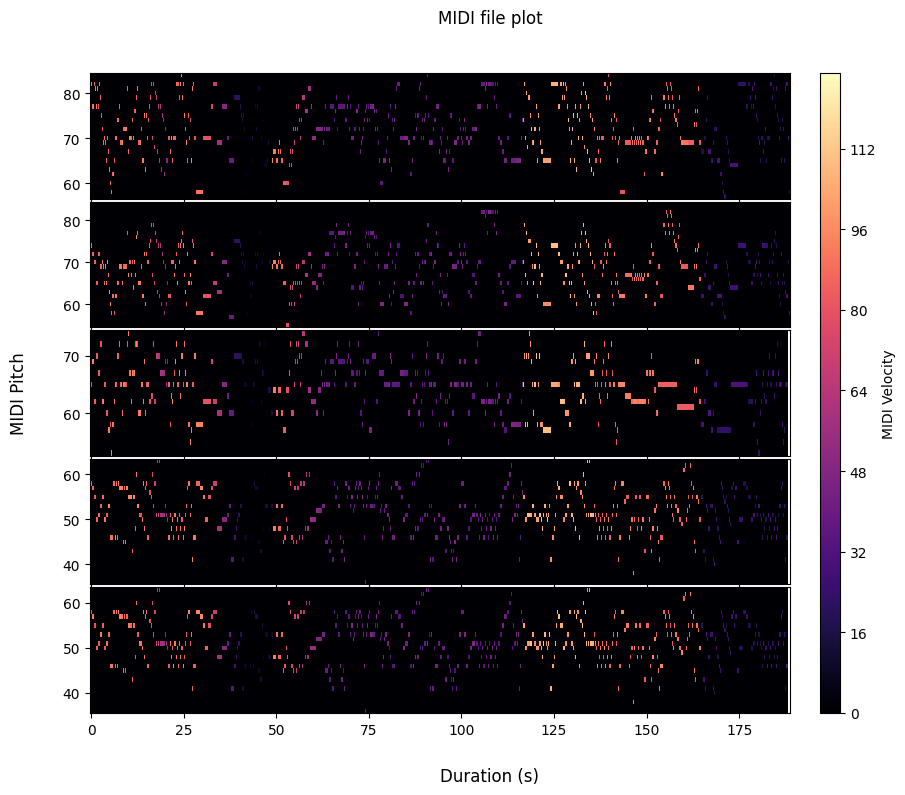

In [4]:
# random dynamic intervals
DynamicsRandomizer.insertDynamicIntervals(seed,midi_data)
Utils.plotMIDI(midi_data)

In [5]:
ArticulationsRandomizer.insertArticulationIntervals(seed=seed,
                                                    articulations = ArticulationsRandomizer.loadYaml(),
                                                    midi_data = midi_data)
for instrument in midi_data.instruments:
    print(instrument.name)
    for control_change in instrument.control_changes:
        print(control_change)

Violin_I
ControlChange(number=32, value=1, time=0.000000)
ControlChange(number=32, value=1, time=94.597403)
Violin_II
ControlChange(number=32, value=1, time=0.000000)
ControlChange(number=32, value=1, time=32.203371)
Viola
ControlChange(number=32, value=1, time=0.000000)
ControlChange(number=32, value=1, time=19.158778)
Cello
ControlChange(number=32, value=15, time=0.000000)
ControlChange(number=32, value=15, time=18.150421)
ControlChange(number=32, value=1, time=173.437355)
Separator


0 segs:	f
13.05 segs:	diminuendo
20.05 segs:	mp
20.22 segs:	f
28.43 segs:	diminuendo
41.43 segs:	ppp
47.8 segs:	f
46.65 segs:	diminuendo
63.65 segs:	p
112.14 segs:	ff
130.53 segs:	f
158.1 segs:	pp


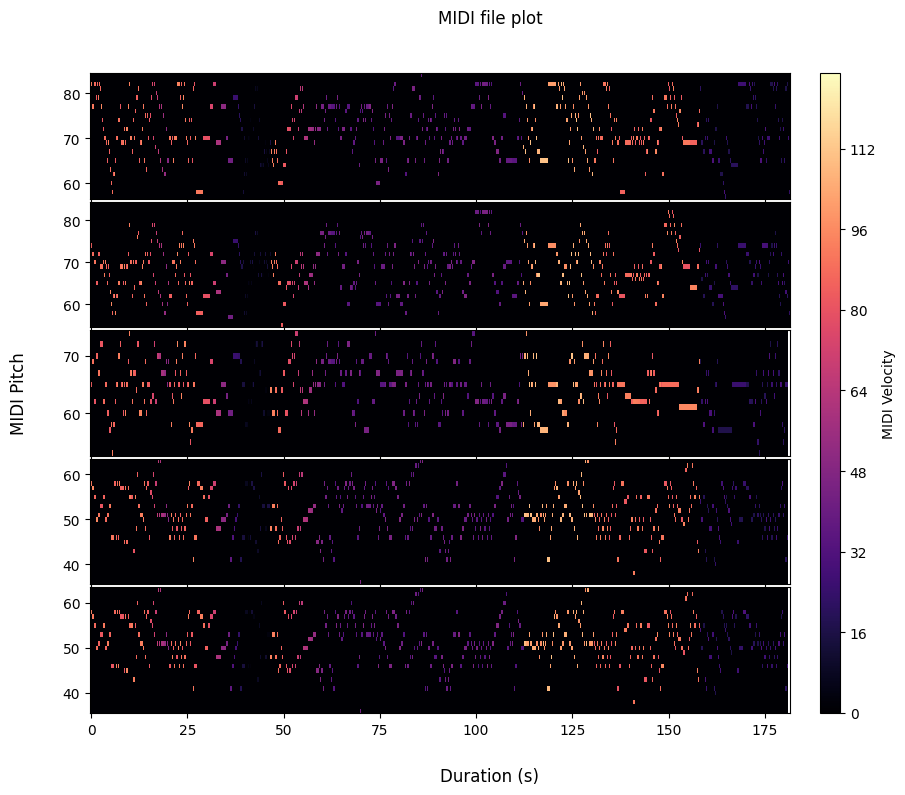

In [6]:
processMIDI(processed_midi_data,seed)
Utils.plotMIDI(processed_midi_data)